## Research Question

**The major objective of the research is to determine the average frequency of illness and attitudes of mental health and how they vary by geographical location in the technology startups.**
Another Objective that will be reviewed is the:
1. What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

## Importing relevant libraries

In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

# Display plots inline in the notebook
%matplotlib inline 

Matplotlib is building the font cache; this may take a moment.


### Loading our dataset

In [2]:
survey=pd.read_csv("survey.csv")

### dataset decription

 
**This dataset contains the following data:**
1. Timestamp
2. Age
3. Gender
4. Country
5. state: If you live in the United States, which state or territory do you live in?
6. self_employed: Are you self-employed?
7. family_history: Do you have a family history of mental illness?
8. treatment: Have you sought treatment for a mental health condition?
9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
10. no_employees: How many employees does your company or organization have?
11. remote_work: Do you work remotely (outside of an office) at least 50% of the time?
12. tech_company: Is your employer primarily a tech company/organization?
13. benefits: Does your employer provide mental health benefits?
14. care_options: Do you know the options for mental health care your employer provides?
15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
18. leave: How easy is it for you to take medical leave for a mental health condition?
19. Mental-health consequences: Do you think that discussing a mental health issue with your employer would have negative consequences?
20. physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
22. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
23. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
24. mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?
25. physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
26. mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
27. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
28. comments: Any additional notes or comments


### Data Exploration

In [3]:
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
survey.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
survey.shape

(1259, 27)

In [6]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
survey.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [9]:
survey.describe(include="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 14:22:43,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [13]:
##lowercasing all columns to lower case
survey.columns = map(str.lower, survey.columns)


In [15]:
## Convert "timestamp" to datetime
survey['timestamp'] = pd.to_datetime(survey['timestamp'])



#### checking for null values

In [17]:
survey.isnull().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [18]:
##dropping null values
survey.dropna(inplace=True)

In [20]:
##checking for duplicates
survey.duplicated().sum()

0

In [ ]:
##dropping unnecessary columns


In [25]:
##remove age outliers
def clean_age(age):
    if age>=0 and age<=123:
        return age
    else:
        return np.nan
survey['age_clean'] = survey['age'].apply(clean_age)
# Check out the new column and make sure it looks right

print("'Age'")
print("Minimum value: ", survey["age_clean"].min())
print("Maximum value: ", survey["age_clean"].max())
print("Frequency table for age_clean:")
survey["age_clean"].value_counts().sort_index(0)

'Age'
Minimum value:  8.0
Maximum value:  56.0
Frequency table for age_clean:


8.0     1
21.0    1
23.0    2
25.0    3
26.0    3
27.0    7
29.0    1
30.0    6
31.0    2
32.0    3
33.0    4
34.0    7
35.0    8
36.0    2
37.0    3
38.0    6
39.0    4
40.0    5
41.0    2
42.0    2
43.0    4
44.0    1
45.0    1
46.0    1
48.0    1
49.0    1
50.0    2
55.0    1
56.0    1
Name: age_clean, dtype: int64

## Sampling Method


In [26]:
## Stratified sampling
survey['tech_company'].value_counts()

Yes    71
No     15
Name: tech_company, dtype: int64

In [27]:
# In our case, we are going to applies a function that puts each subset into a random sample with a size of 749 with a confidence interval 0f 5 and confidence level of 99%.
#The beauty about this method is that it strictly maintains the populations proportion.

# Stratified sample
strat_output = survey.groupby('tech_company', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.749))

# proportion of the non_stratified sample
print(strat_output['tech_company'].value_counts())

# Check the stratified output
print(strat_output)

Yes    53
No     11
Name: tech_company, dtype: int64
               timestamp  age  gender        country state self_employed  \
793  2014-08-28 13:08:36   35  Female  United States    LA            No   
579  2014-08-27 21:15:09   34    Male  United States    IL            No   
756  2014-08-28 11:27:56   38       f  United States    NC            No   
930  2014-08-28 21:41:53   35  Female  United States    GA            No   
346  2014-08-27 14:45:12   23    Male  United States    AL            No   
...                  ...  ...     ...            ...   ...           ...   
1190 2015-01-03 03:38:30   44       M  United States    OH            No   
231  2014-08-27 13:23:38   41    Male  United States    TX            No   
1127 2014-08-30 20:55:11   -1       p  United States    AL           Yes   
158  2014-08-27 12:43:28   27    male  United States    UT            No   
45   2014-08-27 11:43:36   38  Female  United States    TX            No   

     family_history treatment work

In [28]:
strat_output.var()

age          76.700149
age_clean    57.487455
dtype: float64

## Analyis

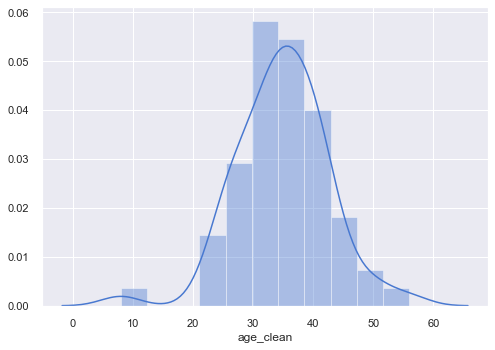

In [30]:
## View the age distribution of the sample¶

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(strat_output["age_clean"].dropna());
# Peak between mid-20s to about mid-40s.

<AxesSubplot:>

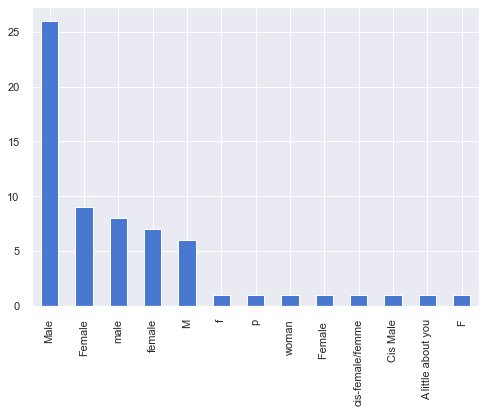

In [31]:
##View the gender distribution of the sample¶


strat_output['gender'].value_counts().plot(kind='bar')

#### Observations
1. The large majority of those that are affected by Mental illness are  Male 

In [33]:
## correlation between treatment and workinterference
# Create a new dataframe with the two columns and assign numbers in place of their categories

df = pd.DataFrame({'treatment': strat_output['treatment'], 'work_interfere': strat_output['work_interfere']}, dtype='category')
df_num = df.apply(lambda x: x.cat.codes)

# Run a correlation calculation 
print("Pearson:", df_num.corr())
print("")
print("Spearman:", df_num.corr('spearman'))
print("")
print("Kendall:", df_num.corr('kendall'))

Pearson:                 treatment  work_interfere
treatment        1.000000        0.392272
work_interfere   0.392272        1.000000

Spearman:                 treatment  work_interfere
treatment        1.000000        0.291244
work_interfere   0.291244        1.000000

Kendall:                 treatment  work_interfere
treatment        1.000000        0.275401
work_interfere   0.275401        1.000000


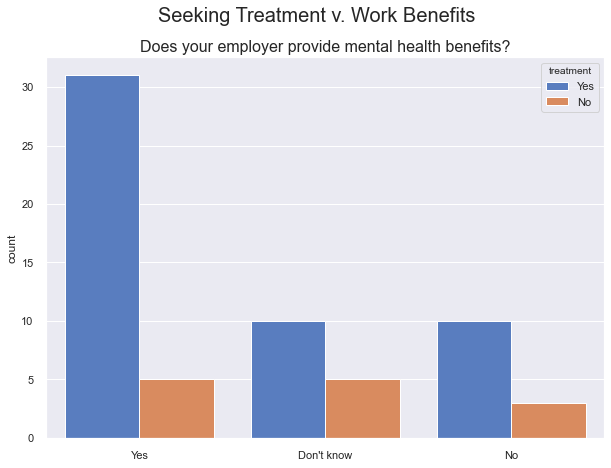

In [34]:
## mental health benefits v. seeking treatment¶
#employee is seeking treatment for a mental health condition appears to be correlated with their knowledge of their employer's mental health benefits.
plt.figure(figsize=(10,7))
sns.countplot(x="benefits", hue="treatment", hue_order = ["Yes", "No"], data=strat_output)
plt.title("Does your employer provide mental health benefits?",fontsize=16)
plt.suptitle("Seeking Treatment v. Work Benefits", fontsize=20)
plt.xlabel("")
plt.show()

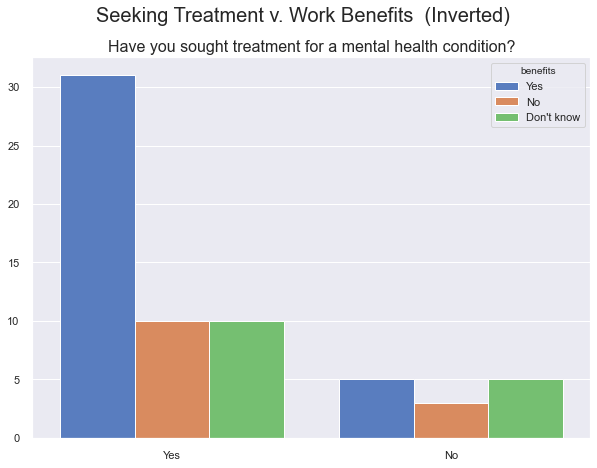

In [35]:
## chart comparing mental health benefits and treatment
plt.figure(figsize=(10,7))
sns.countplot(x="treatment", hue="benefits", hue_order = ["Yes", "No", "Don't know"], data=strat_output)
plt.suptitle("Seeking Treatment v. Work Benefits  (Inverted)", fontsize=20)
plt.title("Have you sought treatment for a mental health condition?",fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

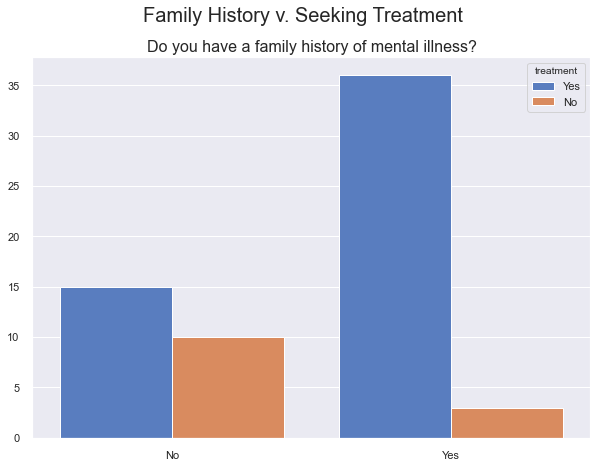

In [36]:
## family history v. seeking treatment
plt.figure(figsize=(10,7))
sns.countplot(x="family_history", hue="treatment", hue_order = ["Yes", "No"], data=strat_output)
plt.suptitle("Family History v. Seeking Treatment", fontsize=20)
plt.title("Do you have a family history of mental illness?", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()


In [38]:
##  Chi-Squared Test of Independence
# Generate crosstabs of "family history" and "treatment" (the "observed" values)
import scipy.stats as stats

tab_famhist_treatment = pd.crosstab(strat_output["family_history"], strat_output["treatment"], margins = True)
tab_famhist_treatment.columns = ["Treatment Yes","Treatment No","row_totals"]
tab_famhist_treatment.index = ["Fam Hist Yes","Fam Hist No","col_totals"]

observed = tab_famhist_treatment.iloc[0:2,0:2]   # Get table without totals for later use

tab_famhist_treatment

,Treatment Yes,Treatment No,row_totals
Fam Hist Yes,10,15,25
Fam Hist No,3,36,39
col_totals,13,51,64


In [39]:
# Generate the "expected" values to compare against our "observed" values

expected =  np.outer(tab_famhist_treatment["row_totals"][0:2],
                     tab_famhist_treatment.loc["col_totals"][0:2]) / 1257

expected = pd.DataFrame(expected)

expected.columns = ["Treatment Yes","Treatment No"]
expected.index = ["Fam Hist Yes","Fam Hist No"]

expected

,Treatment Yes,Treatment No
Fam Hist Yes,0.258552,1.014320
Fam Hist No,0.403341,1.582339


In [40]:
# Run the Chi-Squared test
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

1325.2056457385456


In [41]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

# *Note: The degrees of freedom for a test of independence equals the product of 
# the number of categories in each variable minus 1. In this case we have a 2x2 table 
# so df = 1x1 = 1.

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)
## P value of zero doesn't seem right

Critical value
3.841458820694124
P value
0.0


In [42]:
## How does the frequency of mental health illness vary by geographic location
# Display the distinct countries represented in the data (quantity and names)
print("Country Count =", len(set(strat_output['country'])))
print("Country Names =", set(strat_output['country']))

Country Count = 3
Country Names = {'Bahamas, The', 'United States', 'Israel'}


In [43]:
# Display quantity and names of distinct countries represented in the data (quantity and names)

print("State Count =", len(set(strat_output['state'])))
print("State Names =", set(strat_output['state']))
print(strat_output['state'].describe())

State Count = 23
State Names = {'AL', 'WY', 'LA', 'IN', 'VA', 'MN', 'NC', 'NJ', 'PA', 'WA', 'GA', 'TN', 'OH', 'OR', 'MD', 'NY', 'UT', 'CA', 'MI', 'WI', 'IL', 'TX', 'MA'}
count     64
unique    23
top       WA
freq      11
Name: state, dtype: object


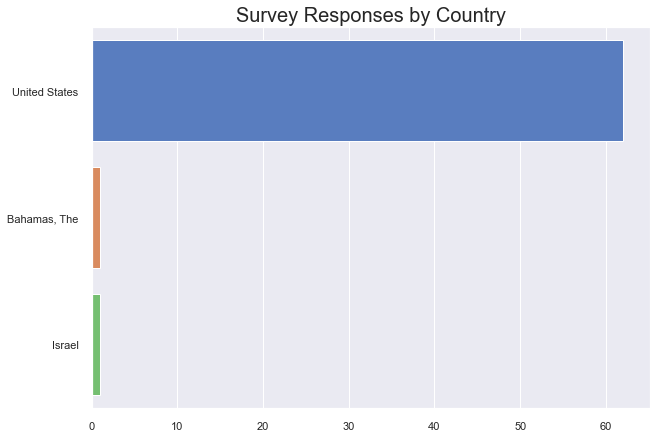

In [44]:
# Create a frequency chart for "country"

plt.figure(figsize=(10, 7))
sns.countplot(y='country', order = strat_output['country'].value_counts().index, data=strat_output)
plt.title('Survey Responses by Country', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

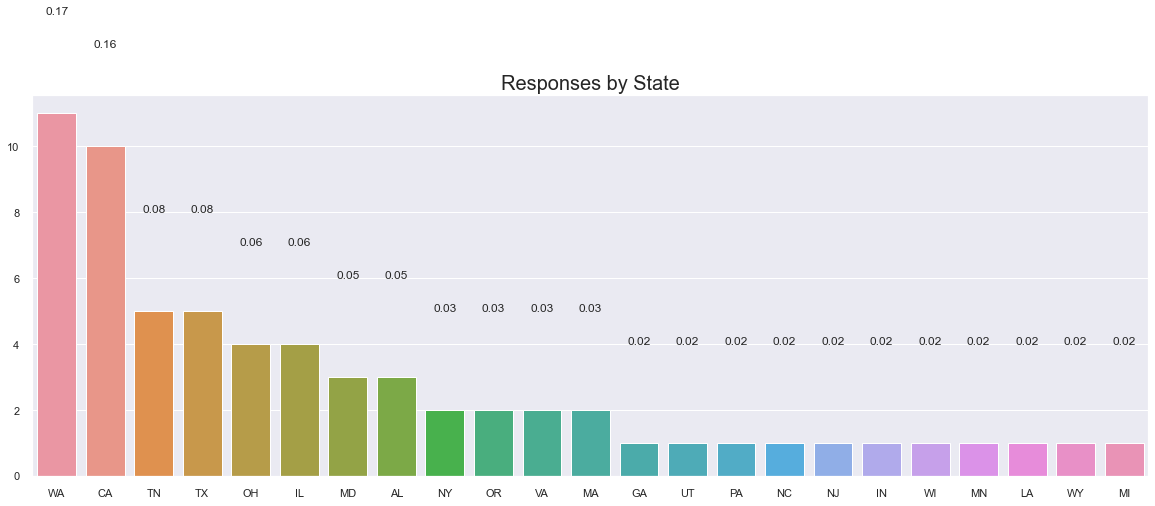

In [45]:
#### Survey Responses by state

total = float(len(strat_output))
plt.figure(figsize=(20, 7))
ax = sns.countplot(x='state', order = strat_output['state'].value_counts().index, data=strat_output)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Responses by State', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

col_0      count
region          
Midwest       12
Northeast      6
South         21
West          25
If we didn't miss anything, this will equal 1257: 64


<AxesSubplot:xlabel='region'>

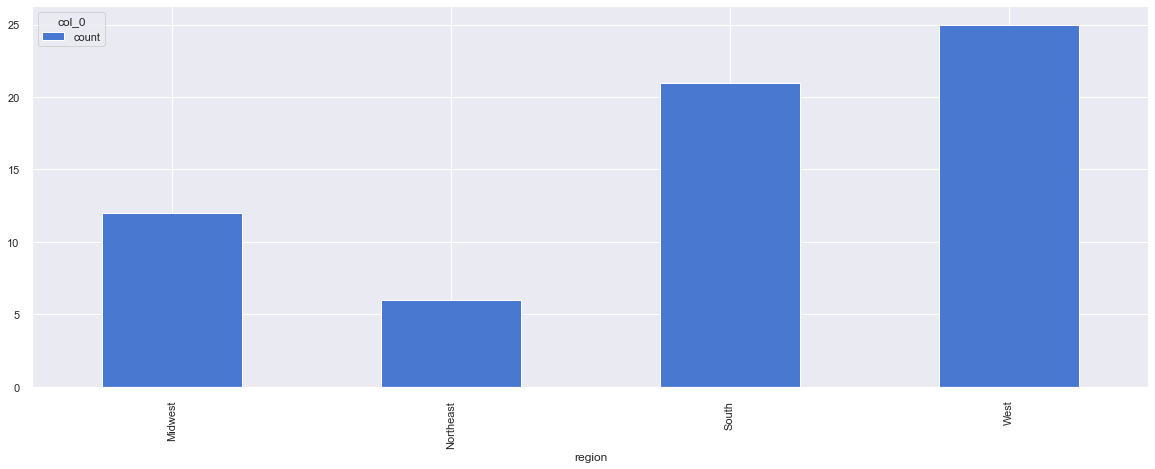

In [55]:
# Define how to recategorize each state into one of the US Census Bureau regions: West, Midwest, South, Northeast

# Mke a copy of the column to preserve the original data. Work with the new column going forward.
strat_output['region'] = strat_output['state']

# Then, in the new column, assign each type of response to one of the new categories

west = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "AZ", "NM", "CO"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "OH", "MI"]
northeast = ["ME",  "NH", "VT", "MA", "CT", "RI", "NY", "PA", "NJ"]
south = ["MD", "DE", "DC", "WV",  "VA", "NC","SC", "GA", "FL", "KY", "TN", "AL", "MS", "AR", "LA", "OK", "TX"]

strat_output['region'] = strat_output['region'].apply(lambda x:"West" if x in west else x)
strat_output['region'] = strat_output['region'].apply(lambda x:"Midwest" if x in midwest else x)
strat_output['region'] = strat_output['region'].apply(lambda x:"Northeast" if x in northeast else x)
strat_output['region'] = strat_output['region'].apply(lambda x:"South" if x in south else x)

# Make a crosstab to view the count for each of the new categories
region_tab = pd.crosstab(index=strat_output["region"], columns="count")

print(region_tab)

# Confirm that we didn't miss any entries
print("If we didn't miss anything, this will equal 1257:", len(strat_output['region']))

region_tab.plot(kind="bar", 
                 figsize=(20,7),
                 stacked=True)

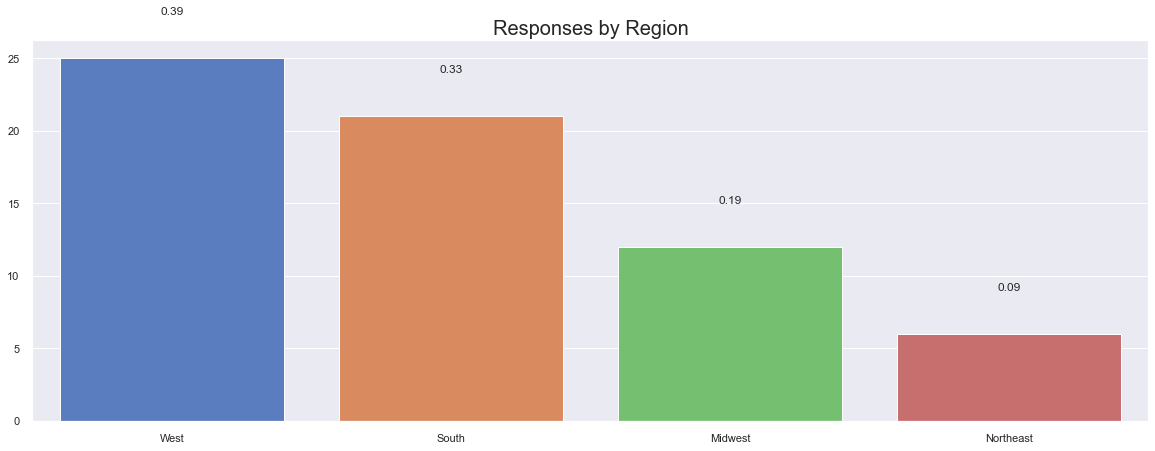

In [56]:
#### Survey Responses by region

total = float(len(strat_output))
plt.figure(figsize=(20, 7))
ax = sns.countplot(x='region', order = strat_output['region'].value_counts().index, data=strat_output)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Responses by Region', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

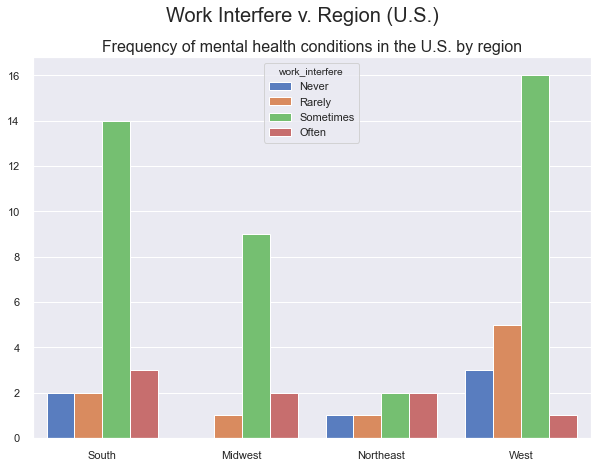

In [57]:
plt.figure(figsize=(10,7))
sns.countplot(x="region", hue="work_interfere", hue_order = ["Never", "Rarely", "Sometimes", "Often"], data=strat_output)
plt.suptitle("Work Interfere v. Region (U.S.)", fontsize=20)
plt.title("Frequency of mental health conditions in the U.S. by region", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [51]:
strat_output['work_interfere']


793     Sometimes
579     Sometimes
756     Sometimes
930     Sometimes
346     Sometimes
          ...    
1190    Sometimes
231        Rarely
1127        Often
158        Rarely
45      Sometimes
Name: work_interfere, Length: 64, dtype: object

col_0  count
ill         
Yes       64
If we didn't miss anything, this will equal 1257: 64


<AxesSubplot:xlabel='ill'>

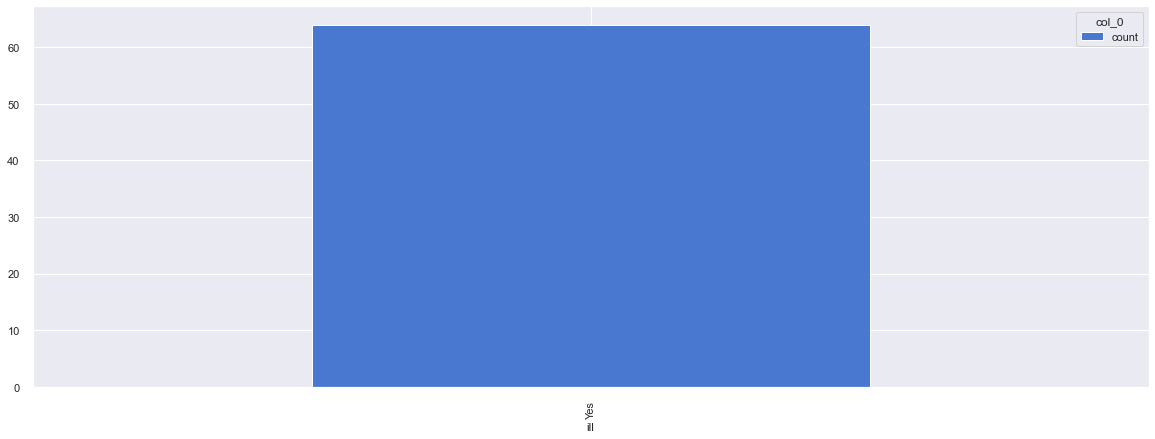

In [58]:
 #Convert the work_interfere responses into a new variable, 

# Make a copy of the column to preserve the original data. Work with the new column going forward.
strat_output['ill'] = strat_output['work_interfere']

# Transform all NaN to "No" (which means, not currently experiencing a mental health condition)
strat_output['ill'] = strat_output['ill'].replace(np.nan, 'No', regex=True)

# Assign each type of response to one of two categories

notill = ["No"]
ill = ["Never", "Rarely", "Sometimes", "Often"]

strat_output['ill'] = strat_output['ill'].apply(lambda x:"Yes" if x in ill else x)
strat_output['ill'] = strat_output['ill'].apply(lambda x:"No" if x in notill else x)

# Make a crosstab to view the count for each of the new categories
ill_tab = pd.crosstab(index=strat_output["ill"], columns="count")

print(ill_tab)

# Confirm that we didn't miss any entries
print("If we didn't miss anything, this will equal 1257:", len(strat_output['ill']))

ill_tab.plot(kind="bar", 
                 figsize=(20,7),
                 stacked=True)

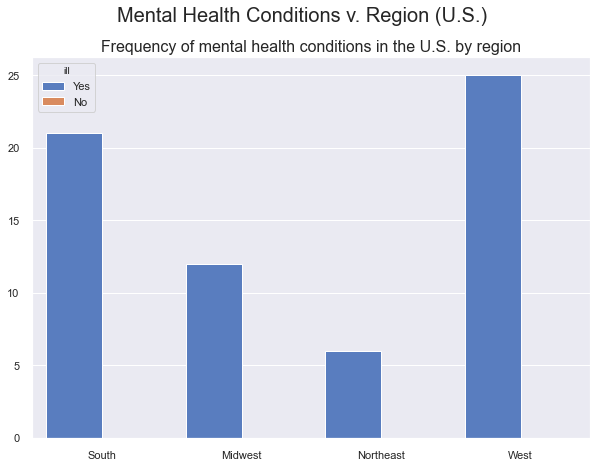

In [59]:
# Display the relationship between "ill" and "region"

plt.figure(figsize=(10,7))
sns.countplot(x="region", hue="ill", hue_order = ["Yes", "No"], data=strat_output)
plt.suptitle("Mental Health Conditions v. Region (U.S.)", fontsize=20)
plt.title("Frequency of mental health conditions in the U.S. by region", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

col_0      count
attitudes       
Moderate      25
Negative      14
Positive      25
If we didn't miss anything, this will equal 1257: 64
AxesSubplot(0.125,0.125;0.775x0.755)


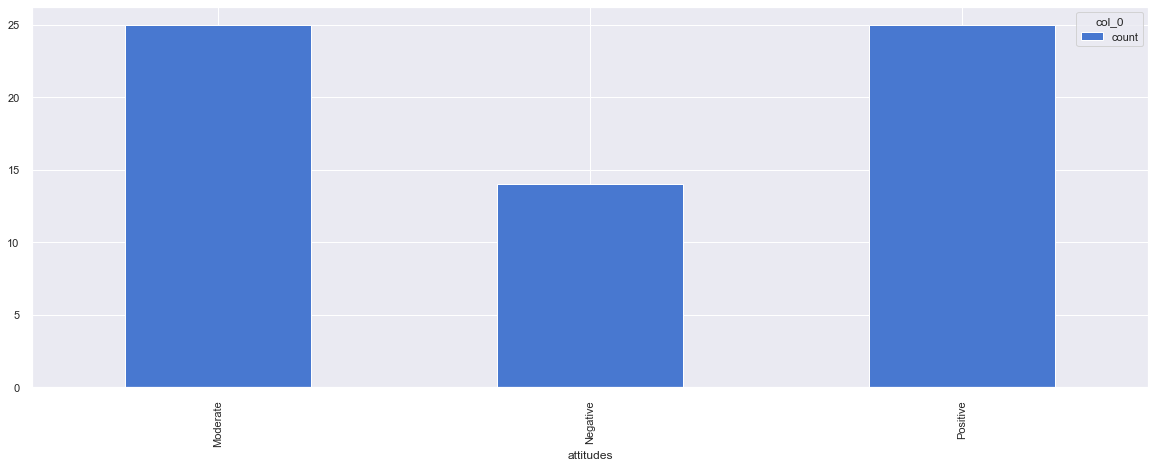

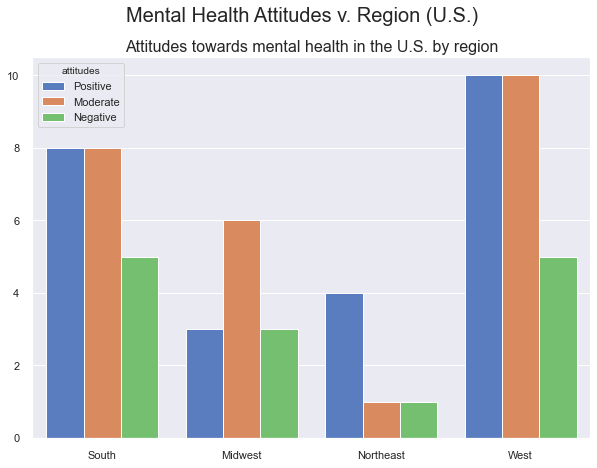

None


In [60]:
# Convert the mental_health_consequence responses into a new variable, 

# Make a copy of the column to preserve the original data. Work with the new column going forward.
strat_output['attitudes'] = strat_output['mental_health_consequence']

# Assign each type of response to one of two categories
positive = ["No"]
negative = ["Yes"]
moderate = ['Maybe']

strat_output['attitudes'] = strat_output['attitudes'].apply(lambda x:"Positive" if x in positive else x)
strat_output['attitudes'] = strat_output['attitudes'].apply(lambda x:"Negative" if x in negative else x)
strat_output['attitudes'] = strat_output['attitudes'].apply(lambda x:"Moderate" if x in moderate else x)


# Make a crosstab to view the count for each of the new categories
attitudes_tab = pd.crosstab(index=strat_output["attitudes"], columns="count")

print(attitudes_tab)

# Confirm that we didn't miss any entries
print("If we didn't miss anything, this will equal 1257:", len(strat_output['attitudes']))

print(attitudes_tab.plot(kind="bar", 
                 figsize=(20,7),
                 stacked=True))


# Display the relationship between "mental_health_consequence" and "region"

plt.figure(figsize=(10,7))
sns.countplot(x="region", hue="attitudes", hue_order = ["Positive", "Moderate", "Negative"], data=strat_output)
plt.suptitle("Mental Health Attitudes v. Region (U.S.)", fontsize=20)
plt.title("Attitudes towards mental health in the U.S. by region", fontsize=16)
plt.xlabel("")
plt.ylabel("")
print(plt.show())